In [3]:
# Import libraries
import numpy as np
import pandas_profiling
from scipy.stats import mode
import scipy as sc
import pandas as pd
import xgboost as xgb # XGBoost typically uses the alias "xgb"
import numpy as np
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
df=pd.read_csv("~/Desktop/newset.csv", delimiter = ','sep = r',')

SyntaxError: invalid syntax (<ipython-input-4-335b5fa4a60c>, line 1)

In [89]:
df.shape
df.info()

(202, 71)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 71 columns):
sales                               202 non-null float64
NUMBER                              202 non-null int64
POPULATION                          202 non-null int64
DENSITY                             202 non-null float64
MALE                                202 non-null int64
FEMALE                              202 non-null int64
MALE_MED_AGE                        202 non-null float64
FEMALE_MED_AGE                      202 non-null float64
FAM_HH                              202 non-null int64
NON_FAM_HH                          202 non-null int64
WHITE                               202 non-null int64
HISPANIC                            202 non-null int64
BLACK                               202 non-null int64
ASIA                                202 non-null int64
OTHER                               202 non-null int64
HOUSE_OWNER                         202 non-null int64
HOUSE_R

In [90]:
df.describe()

,sales,NUMBER,POPULATION,DENSITY,MALE,FEMALE,MALE_MED_AGE,FEMALE_MED_AGE,FAM_HH,NON_FAM_HH,...,Med_female_earning,Med_male_earning,Med_earning,Med_Bachelor_earning,Med_Grad_earning,Household_income,Per_household_income,Med_income_2010,Mean_inome,Per_poverty
count,2.020000e+02,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,9.107574e+06,11.331683,35762.232673,2238.883366,17422.519802,18422.930693,34.938960,37.424752,9167.757426,4586.480198,...,29013.113861,42420.103960,35176.267327,50686.222772,62835.113861,598.242574,0.045047,60761.163366,75906.351485,0.115361
std,3.106268e+06,10.793580,16429.323648,2768.932471,7954.472039,8337.127871,4.853219,5.637144,4234.011021,2103.386245,...,7219.337590,13844.082609,9584.931979,9855.684189,14573.361738,666.186471,0.044357,19997.423079,23582.281545,0.073068
min,2.452094e+06,1.000000,1379.000000,269.440000,1657.000000,1812.000000,23.300000,24.300000,851.000000,427.000000,...,9686.000000,5805.000000,11882.000000,26763.000000,5154.000000,10.000000,0.000901,7130.000000,4690.000000,0.013000
25%,6.993736e+06,5.000000,22971.250000,1148.315000,11080.250000,11784.250000,31.700000,33.600000,5829.750000,3099.750000,...,24295.500000,32481.000000,29102.000000,43284.000000,53301.500000,204.000000,0.015018,45793.750000,59238.250000,0.060250
50%,9.115936e+06,8.000000,34872.000000,1908.790000,16941.500000,17708.500000,34.250000,36.900000,8849.000000,4472.500000,...,28136.000000,40654.000000,33885.500000,50075.500000,61445.000000,387.500000,0.031566,59161.000000,74501.500000,0.100000
75%,1.097554e+07,12.000000,46440.000000,2826.140000,22776.250000,23804.250000,37.850000,40.375000,11860.000000,5911.250000,...,32196.500000,48774.750000,40396.250000,56390.250000,70460.750000,762.750000,0.055706,71172.500000,87043.750000,0.147000
max,1.881678e+07,37.000000,88996.000000,37247.000000,43219.000000,45777.000000,52.100000,59.700000,22558.000000,11259.000000,...,53168.000000,92321.000000,63050.000000,85091.000000,102908.000000,4822.000000,0.269477,122694.000000,174836.000000,0.405000


In [7]:
df2 = df1.reset_index()

NameError: name 'df1' is not defined

In [91]:
# Compute correlation matrix 
df.corr()
corr_df = DataFrame(df.corr())
# Check the dimensions of the correlation matrix
corr_df.shape
# Write out correlation matrix to Excel; Examine correlations in Excel with Conditional Formatting 
corr_df.to_excel("~/Desktop/corr_bookings.xlsx", sheet_name = 'corr_bookings', index= False)

,sales,NUMBER,POPULATION,DENSITY,MALE,FEMALE,MALE_MED_AGE,FEMALE_MED_AGE,FAM_HH,NON_FAM_HH,...,Med_female_earning,Med_male_earning,Med_earning,Med_Bachelor_earning,Med_Grad_earning,Household_income,Per_household_income,Med_income_2010,Mean_inome,Per_poverty
sales,1.000000,0.257551,0.006216,-0.088592,0.009102,0.001853,-0.099672,-0.138201,0.026638,-0.076402,...,0.215227,0.166965,0.205073,0.166529,0.150794,0.047134,0.060147,0.125656,0.116877,-0.124203
NUMBER,0.257551,1.000000,0.236752,-0.023603,0.242026,0.229842,-0.185115,-0.176589,0.232996,0.005668,...,0.093962,0.060868,0.091477,0.102446,0.095992,0.154663,0.081295,0.061069,0.065092,0.016652
POPULATION,0.006216,0.236752,1.000000,0.045400,0.994734,0.995164,-0.209521,-0.220222,0.978250,0.623903,...,-0.008852,-0.007227,0.003720,0.022753,0.053827,0.414633,-0.005575,0.076419,0.052546,0.024602
DENSITY,-0.088592,-0.023603,0.045400,1.000000,0.043959,0.044583,-0.088804,-0.057354,0.019573,0.015032,...,-0.026153,-0.068125,-0.051883,-0.018899,-0.052895,-0.052472,-0.087912,-0.050606,-0.083587,0.037185
MALE,0.009102,0.242026,0.994734,0.043959,1.000000,0.994777,-0.226850,-0.242381,0.977788,0.608031,...,-0.010110,0.001598,0.009318,0.040905,0.071419,0.425612,0.020673,0.100680,0.072452,0.027132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Household_income,0.047134,0.154663,0.414633,-0.052472,0.425612,0.423676,0.245912,0.158494,0.487540,0.088442,...,0.552140,0.653012,0.644244,0.606604,0.638058,1.000000,0.802072,0.679199,0.749957,-0.404508
Per_household_income,0.060147,0.081295,-0.005575,-0.087912,0.020673,0.013401,0.376597,0.267716,0.084238,-0.221682,...,0.645595,0.808670,0.773562,0.730717,0.724089,0.802072,1.000000,0.810085,0.922504,-0.491113
Med_income_2010,0.125656,0.061069,0.076419,-0.050606,0.100680,0.088269,0.326872,0.212600,0.186444,-0.314614,...,0.792149,0.863818,0.879220,0.812986,0.766122,0.679199,0.810085,1.000000,0.922056,-0.740247
Mean_inome,0.116877,0.065092,0.052546,-0.083587,0.072452,0.066354,0.408180,0.286875,0.160713,-0.269011,...,0.759225,0.882586,0.873468,0.814142,0.787204,0.749957,0.922504,0.922056,1.000000,-0.696317


(70, 70)

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
df.corr()['POPULATION'].sort_values(ascending=False)

NameError: name 'df' is not defined

In [6]:
df.corr()['sales'].sort_values(ascending=False)

NameError: name 'df' is not defined

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [8]:
df.isnull().sum()

NameError: name 'df' is not defined

In [17]:
df1

,sales,NUMBER,POPULATION,DENSITY,MALE,FEMALE,MALE_MED_AGE,FEMALE_MED_AGE,FAM_HH,NON_FAM_HH,...,Med_female_earning,Med_male_earning,Med_earning,Med_Bachelor_earning,Med_Grad_earning,Household_income,Per_household_income,Med_income_2010,Mean_inome,Per_poverty
0,1.198694e+07,9,25270,3351.46,12827,12443,30.9,33.6,5787,4004,...,21551,23656,22572,54351,66918,33,0.003435,35449,43775,0.259
1,1.071057e+07,12,45211,1137.67,22227,22984,33.5,35.6,11653,3815,...,28026,37301,33834,60952,61560,603,0.041158,66111,82765,0.149
2,7.539740e+06,13,29290,3243.63,13740,15550,37.3,42.4,7501,6094,...,26341,38980,31925,44399,48873,255,0.019157,45590,56370,0.129
3,7.398751e+06,9,36150,1894.65,16956,19194,32.1,35.4,9612,3561,...,34254,37280,36056,47433,58107,422,0.033163,64582,76341,0.063
4,1.003226e+07,26,70840,2231.18,33982,36858,26.5,29.3,16504,3310,...,16451,26643,22094,40457,45300,62,0.003219,30652,41856,0.369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,5.757900e+06,9,61132,1458.65,29910,31222,29.2,30.9,13240,11248,...,18739,30071,22904,43260,59769,451,0.018953,49884,63523,0.160
198,1.063100e+07,8,19157,1911.88,9283,9874,44.9,48.6,5438,2705,...,36797,62675,50100,58333,53529,1046,0.130766,82475,110365,0.061
199,1.151634e+07,6,54952,2532.35,26351,28601,30.5,32.3,11934,11259,...,19061,23172,21179,35119,38424,137,0.005883,38372,47567,0.198
200,1.534472e+07,37,65099,2317.52,31834,33265,33.3,34.6,17375,5694,...,36021,57478,45229,62774,80433,1060,0.047894,81819,94727,0.050


In [10]:
from sklearn.cluster import KMeans
wcss=[]
df1=pd.read_csv("~/Desktop/newset.csv")

In [32]:
X= df1.iloc[:, [0,70]].values
from sklearn.cluster import KMeans
wcss=[]

In [33]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

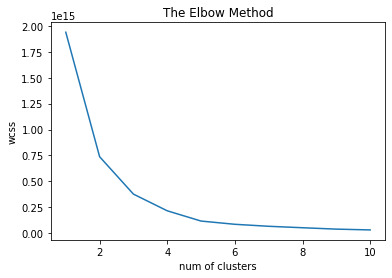

In [34]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('num of clusters')
plt.ylabel('wcss')
plt.show()

In [52]:
kmeansmodel = KMeans(n_clusters= 10, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

NameError: name 'y_K' is not defined

In [41]:
/* global __DEV__ */

SyntaxError: invalid syntax (<ipython-input-41-c65504af484a>, line 1)

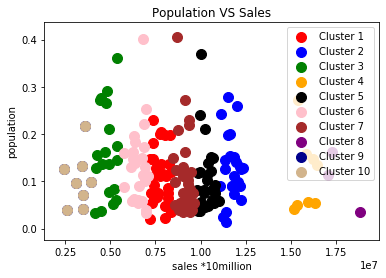

NameError: name 'dev' is not defined

In [40]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'brown', label = 'Cluster 7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7, 1], s = 100, c = 'purple', label = 'Cluster 8')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = 'darkblue', label = 'Cluster 9')
plt.scatter(X[y_kmeans == 8, 0], X[y_kmeans == 8, 1], s = 100, c = 'Tan', label = 'Cluster 10')
plt.title('Population VS Sales')
plt.xlabel('sales *10million')
plt.ylabel('population')
plt.legend()
plt.show()

In [51]:
y_kmean.to_csv("~/Desktop/test.csv")

NameError: name 'y_kmean' is not defined

In [ ]:
df1.to_csv("~/Desktop/test.csv")

In [49]:
exportToCSV(data = df1, directory = './Results/', annotations = result$annotations)

SyntaxError: invalid syntax (<ipython-input-49-a179956cff76>, line 1)

In [46]:
y_kmeans.to_csv('happy',index=False,
          compression=compression_opts)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [126]:
y_kmeans.to_csv(happy)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [127]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
